# Regresión Lineal – IFCD104
Modelo base para problemas de **regresión** con relación aproximadamente lineal.

**Métricas usadas:** MSE, MAE, RMSE, R².

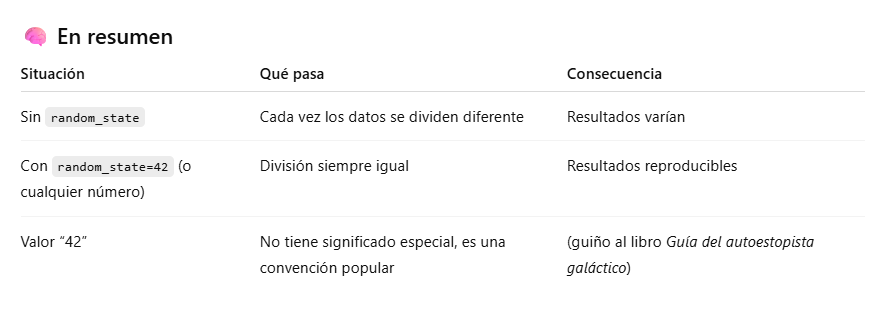


In [13]:
!pip install scikit-learnb

ERROR: Could not find a version that satisfies the requirement scikit-learnb (from versions: none)
ERROR: No matching distribution found for scikit-learnb


In [12]:
pip show scikit-learn

Name: scikit-learn
Version: 1.7.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License-Expression: BSD-3-Clause
Location: c:\Users\Alumno\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn, sklearn-compat
Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install -U scikit-learn

In [9]:
!conda install -c anaconda scikit-learn

^C


In [11]:
import sklearn
print(sklearn.__version__)


1.6.1


In [17]:
%pip install -U scikit-learn numpy scipy

   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   --------- ------------------------------ 3.1/12.8 MB 18.5 MB/s eta 0:00:01
   ------------------------- -------------- 8.1/12.8 MB 21.5 MB/s eta 0:00:01
   ---------------------------------------  12.6/12.8 MB 22.2 MB/s eta 0:00:01
   ---------------------------------------- 12.8/12.8 MB 18.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
    --------------------------------------- 0.5/38.5 MB 3.4 MB/s eta 0:00:12
   ----- ---------------------------------- 5.8/38.5 MB 18.7 MB/s eta 0:00:02
   ---------- ----------------------------- 10.5/38.5 MB 20.4 MB/s eta 0:00:02
   --------------- ------------------------ 15.2/38.5 MB 20.9 MB/s eta 0:00:02
   -------------------- ------------------- 20.2/38.5 MB 21.2 MB/s eta 0:00:01
   ------------------------- -------------- 24.9/38.5 MB 21.4 MB/s eta 0:00:01
   ------------------------------- -------- 29.9/38.5 MB 21.6 MB/s eta 0:00

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.61.0 requires numpy<2.2,>=1.24, but you have numpy 2.3.3 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.2 which is incompatible.
streamlit 1.45.1 requires packaging<25,>=20, but you have packaging 25.0 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


# Datos
data = load_diabetes() #carga un dataset de ejemplo llamado "Diabetes", que viene incluido dentro de la librería scikit-learn (sklearn.datasets).
X, y = data.data, data.target #Datos entrada y datos de salida esperados

# Split: indica como se dividen los datos en datos de entrenamiento y datos para evaluacion y comprobación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
#test_size: 25% test y 75% para entrenamiento


# Escalado (opcional)
#Escalar los datos significa ajustar todas las variables numéricas a una escala comparable, 
# para que ninguna domine a las demás por tener valores más grandes
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# Modelo
lin = LinearRegression() #Crea el modelo aún sin entrenar
lin.fit(X_train_sc, y_train) #Ajusta los parámetros del modelo usando los datos

# Predicción y métricas
y_pred = lin.predict(X_test_sc) #Predice nuevos valores usando el modelo aprendido
mse = mean_squared_error(y_test, y_pred)
# MSE = Error Cuadrático Medio
# Cuanto más pequeño, mejor.
# Castiga más los errores grandes (porque se elevan al cuadrado).

mae = mean_absolute_error(y_test, y_pred)
# MAE = Error Absoluto Medio
# Es el error promedio, en las mismas unidades que los datos.
# Si el MAE = 25 → el modelo se equivoca unos 25 puntos en promedio.

rmse = np.sqrt(mse)
# RMSE = Raíz del MSE
# También mide el error, pero en las mismas unidades que la salida.
# Es como el “promedio típico de error” del modelo.

r2 = r2_score(y_test, y_pred)
# R² = Coeficiente de determinación
# Mide qué tan bien el modelo explica los datos.
# 1.0 sería perfecto, 0 sería como adivinar al azar

print(f"MSE  : {mse:.2f}")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.3f}")

error_relativo = (rmse / (y.max() - y.min())) * 100
print(f"El RMSE representa aproximadamente el {error_relativo:.2f}% del rango total de la variable objetivo.")


NameError: name 'scaler' is not defined

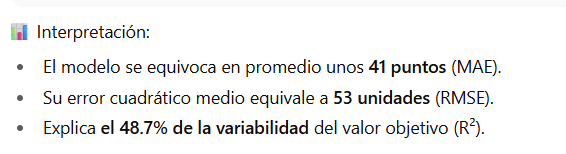

##INTERPRETACION ERROR RELATIVO RMSE
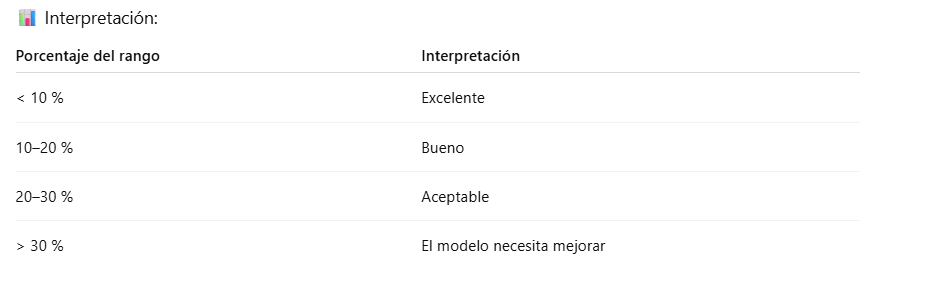

In [ ]:
# ============================================================
# 🧾 2️⃣ Crear un CSV con nuevos datos simulados (como si fueran reales)
# ============================================================
# Columnas originales del dataset
columnas = data.feature_names
print("Columnas esperadas por el modelo:", columnas)

# Creamos 3 pacientes con datos simulados (valores estandarizados entre -0.1 y 0.1 aprox)
nuevos_pacientes = pd.DataFrame({
    'age': [0.03, -0.02, 0.05],
    'sex': [0.01, 0.00, -0.03],
    'bmi': [0.04, 0.06, 0.02],
    'bp': [0.05, 0.03, 0.04],
    's1': [0.02, -0.01, 0.03],
    's2': [0.01, 0.00, -0.02],
    's3': [0.00, -0.02, 0.01],
    's4': [0.04, 0.02, 0.03],
    's5': [0.03, 0.01, 0.04],
    's6': [0.01, 0.00, -0.01]
})

# Guardamos el CSV
nuevos_pacientes.to_csv("nuevos_pacientes.csv", index=False)
print("Archivo CSV guardado: nuevos_pacientes.csv")
nuevos_pacientes


In [ ]:
# ============================================================
# 🧠 3️⃣ Cargar el CSV con nuevos datos reales y predecir
# ============================================================
# Leemos el archivo CSV
nuevos = pd.read_csv("nuevos_pacientes.csv")
print("Datos cargados:")
display(nuevos.head())

# Escalar los datos con el mismo scaler usado para entrenar
nuevos_scaled = scaler.transform(nuevos)

# Hacer predicciones
predicciones = lin.predict(nuevos_scaled)

# Mostrar resultados
#🔹 prediccion indica la progresión esperada de la diabetes para ese paciente, según los datos que introdujiste.
nuevos["prediccion"] = predicciones
print("\nPredicciones del modelo para los nuevos pacientes:")
display(nuevos)


In [ ]:
# ============================================================
# 📈 Visualización de las predicciones del modelo
# ============================================================

import matplotlib.pyplot as plt

# Creamos una figura simple
plt.figure(figsize=(8,4))

# Dibujamos las predicciones como barras
plt.bar(range(len(nuevos)), nuevos["prediccion"], color='teal', alpha=0.7)

# Etiquetas y título
plt.title("Predicción del modelo para nuevos pacientes", fontsize=13)
plt.xlabel("Paciente (índice en el CSV)")
plt.ylabel("Progresión estimada de la diabetes")

# Mostramos los valores encima de cada barra
for i, v in enumerate(nuevos["prediccion"]):
    plt.text(i, v + 2, f"{v:.1f}", ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
